# 5. Multinomial Logistic Regression

**Purpose:** Learn and revise **Multinomial Logistic Regression** (multi-class classification) in Scikit-learn.

---

## What is Multinomial Logistic Regression?

**Multinomial logistic regression** extends logistic regression to **more than two classes** (e.g. class 0, 1, 2, ...). For each class \( k \), we have a linear score \( z*k = \beta*{k0} + \beta\_{k1} x_1 + \ldots \). Probabilities are given by the **softmax** function:

\[
P(y=k \mid X) = \frac{e^{z_k}}{\sum_j e^{z_j}}
\]

- The class with the **highest probability** is the predicted class.
- In Scikit-learn, **LogisticRegression** with **multi_class='multinomial'** (and solver that supports it, e.g. 'lbfgs') does this. It is the default for \( K > 2 \) when using 'lbfgs' or 'newton-cg'.


## Concepts to Remember

| Concept               | Description                                                                                    |
| --------------------- | ---------------------------------------------------------------------------------------------- |
| **Softmax**           | Converts scores \( z_k \) into probabilities that sum to 1.                                    |
| **One-vs-Rest (OvR)** | Alternative: train one binary classifier per class; predict the class with highest confidence. |
| **multinomial**       | Single model with K coefficient vectors; naturally handles multiple classes.                   |
| **When to use**       | Multi-class classification when you want class probabilities and a linear decision boundary.   |


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Three classes (three blobs)
np.random.seed(42)
X0 = np.random.randn(40, 2) + np.array([0, 2])
X1 = np.random.randn(40, 2) + np.array([2, 0])
X2 = np.random.randn(40, 2) + np.array([2, 2])
X = np.vstack([X0, X1, X2])
y = np.array([0] * 40 + [1] * 40 + [2] * 40)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = LogisticRegression(solver="lbfgs", random_state=42, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.75
Confusion matrix:
 [[7 0 1]
 [1 6 3]
 [1 0 5]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       1.00      0.60      0.75        10
           2       0.56      0.83      0.67         6

    accuracy                           0.75        24
   macro avg       0.78      0.77      0.75        24
weighted avg       0.81      0.75      0.75        24



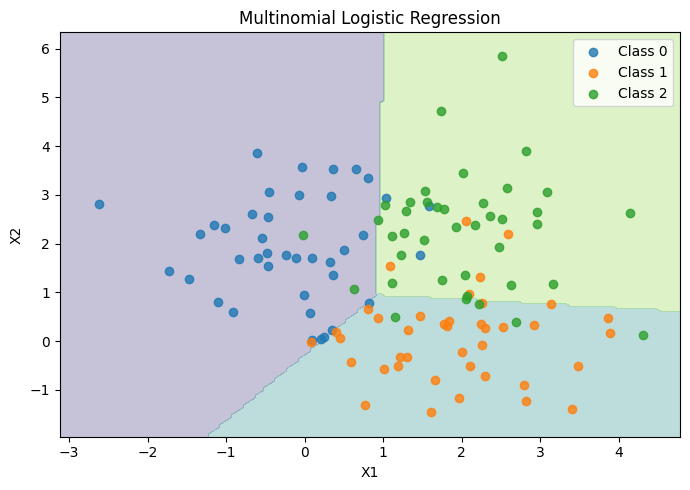

In [5]:
# Decision regions (multiclass)
h = 0.05
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, alpha=0.3, levels=2)
plt.scatter(X[y == 0, 0], X[y == 0, 1], alpha=0.8, label="Class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], alpha=0.8, label="Class 1")
plt.scatter(X[y == 2, 0], X[y == 2, 1], alpha=0.8, label="Class 2")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Multinomial Logistic Regression")
plt.tight_layout()
plt.show()

## Key Takeaways

- Use **LogisticRegression** with **multi_class='multinomial'** and **solver='lbfgs'** (or 'newton-cg') for true multinomial loss.
- **model.coef\_** has shape (n*classes, n_features); \*\*model.intercept*\*\* has shape (n_classes,).
- **predict_proba** returns a matrix of shape (n_samples, n_classes).
